# Trabajo Final procesamiento de lenguaje natural (NLP) <a class="tocSkip">
## Universidad Pontificia Bolivariana <a class="tocSkip">

**Estudiante:** Ana Maria Gutierrez

**ID:** 000150465



**Subir Este notebook de Trabajo Final en su repositorio de GitHub. y enviar el link en **Microsoft TEAMS**

Docente: [Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Objetivo del Trabajo
Realizar un proceso de Procesamiento de lenguaje natural (NLP) para dejar los datos preparados para ser usados con algoritmos de Machine Learning para Clasificación como objetivo final del trabajo.

los datos preparados para ser usados con algoritmos de Machine Learning para Regresión o Clasificación como objetivo final del trabajo.

El trabajo se realizara en este jupyter notebook y subirlo a su repositorio de github creado en clase. (**Recuerde poner su nombre e información**)

## Las actividades a realizar
    

1) Limpiar los datos de texto.

   - https://joserzapata.github.io/courses/nlp/procesamiento-basico/

   - https://joserzapata.github.io/courses/nlp/preprocesamiento-texto/

2) Realizar la representación de texto:

   - https://joserzapata.github.io/courses/nlp/representaciones/

   - Tokenización
   - Lematización o stemming
   - Representación de los datos de texto (Bag of Words o TF-IDF)

3) Utilice un modelo de Machine Learning para clasificación para entrenar y evaluar el modelo.
        
    - Calcule estas las métricas de evaluación (accuracy, precision, recall, f1-score) - https://joserzapata.github.io/courses/python-ciencia-datos/clasificacion/#evaluacion-modelo-simple


    
   
    
*NOTA: No dude en contactarme para cualquier pregunta o inquietud :) por el chat de Teams o al correo
joser.zapata@upb.edu.co*

## EVALUACIÓN


|Porcentaje en la evaluación | Descripción| Nada | Incompleto | Completo 
| :---: |:---: |:---: |:---: |:---: 
| 5 % |**limpieza de los datos** |
| 5 % | **Representacion de los datos** |
| 5 % | **Machine Learning** <br> Entrenar y evaluar el modelo propuesto |


In [44]:
import pandas as pd


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)
from sklearn.model_selection import train_test_split

Carga del dataset

El archivo  se carga en aproximadamente 10 segundos

In [45]:
# Usar su ID UPB Ejemplo: "0028984798"
id_upb = "000150465"

data_reviews = pd.read_parquet(
    "https://www.dropbox.com/scl/fi/gvk9yj8cn96oocr9z058x/filmaffinity_reviews_dataset.parquet?rlkey=xgvr00zvkxbkwqqavqutpsshg&st=xjb7xze9&dl=1"
)
data_reviews = data_reviews.sample(n=50_000, random_state=int(id_upb))
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 64933 to 114882
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_review_desc  50000 non-null  string
 1   author_rating       50000 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 1.1 MB


Ejemplo de algunas filas del dataset

In [46]:
data_reviews.sample(5)

,author_review_desc,author_rating
127794,"\nNo importa cuántas veces la vea, Your Name s...",10
118229,\nNo quiero decir con ello que la peli sea mal...,6
125469,\nEsta película es un fiasco tan enorme que só...,3
106952,\nNo sé que nos ha dado por las series coreana...,5
87015,\nSencillamente espantosa. Una buenísima pelíc...,8


Evaluar los valores nulos

In [47]:
data_reviews.isnull().sum()

author_review_desc    0
author_rating         0
dtype: int64

En este caso no hay nulos.

Revisar si hay valores duplicados:

In [48]:
data_reviews.duplicated().sum()

np.int64(4)

No hay  valores duplicados.

## Clasificación Tradicional para Análisis de Sentimientos y Categorías 👍 👎



Definición: Se considera reseña positiva cuando la puntuación ("author_rating") es mayor que 6; negativa en caso contrario.

Crear la variable binaria de sentimiento: 1 (positivo) si author_rating > 6, 0 (negativo) de lo contrario

In [49]:
UMBRAL = 6
data_reviews["sentiment_bin"] = (data_reviews["author_rating"] > UMBRAL).astype(int)

In [50]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_data = data_reviews["author_review_desc"]
y_data = data_reviews["sentiment_bin"]


Dividir el dataset en entrenamiento y prueba

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    stratify=y_data,  # Mantener la proporción de clases en ambos conjuntos
    random_state=42,
)

## Análisis exploratorio de los datos

para determinar que tipo de limpieza se debe realizar a los datos de texto de `X_train`

In [52]:
X_train.str.contains(r"http").mean()     # porcentaje con URLs
X_train.str.contains(r"@\w+").mean()     # porcentaje con menciones
X_train.str.contains(r"#\w+").mean()     # hashtags

np.float64(0.001625)

In [53]:
X_train.apply(lambda x: len(x.split())).describe()


count    40000.000000
mean       237.173375
std        179.950894
min          4.000000
25%        108.000000
50%        186.000000
75%        313.000000
max       1108.000000
Name: author_review_desc, dtype: float64

## 1) Limpieza de los datos de texto

Tomar los datos de `X_train` y aplicar las funciones de limpieza que considere necesarias

Ayudas:

- Convertir a minúsculas
- Eliminar caracteres especiales y números
- Corregir palabras mal escritas
- etc


In [54]:
# Convertir texto a minúsculas
X_train_lower = X_train.str.lower()

# Mostrar 5 lineas
pd.DataFrame({
    'Original': X_train.head(5),
    'Minúsculas': X_train_lower.head(5)
})


,Original,Minúsculas
35217,"\nUna vez más, las loables intenciones son mej...","\nuna vez más, las loables intenciones son mej..."
91008,"\nHacer cine, hacer buen cine es una tarea con...","\nhacer cine, hacer buen cine es una tarea con..."
69408,\n¿Quién dijo rigor histórico? Tarantino desde...,\n¿quién dijo rigor histórico? tarantino desde...
51452,\nTony Scott dirige este remake del clásico de...,\ntony scott dirige este remake del clásico de...
55503,\nPelícula de terror postapocalíptico que se d...,\npelícula de terror postapocalíptico que se d...


In [55]:
import re

# 2. Eliminar caracteres especiales y números
X_train_clean = X_train_lower.apply(lambda x: re.sub(r'[^a-záéíóúüñ\s]', '', x))

# Eliminar espacios extra
X_train_clean = X_train_clean.apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Mostrar ejemplos
pd.DataFrame({
    'Minuscula': X_train_lower.head(5),
    'Sin caracteres especiales': X_train_clean.head(5)
})


,Minuscula,Sin caracteres especiales
35217,"\nuna vez más, las loables intenciones son mej...",una vez más las loables intenciones son mejore...
91008,"\nhacer cine, hacer buen cine es una tarea con...",hacer cine hacer buen cine es una tarea conjun...
69408,\n¿quién dijo rigor histórico? tarantino desde...,quién dijo rigor histórico tarantino desde lue...
51452,\ntony scott dirige este remake del clásico de...,tony scott dirige este remake del clásico de a...
55503,\npelícula de terror postapocalíptico que se d...,película de terror postapocalíptico que se dej...


## 2) Representacion del texto

Luego de tener los datos limpios, realizar la representación de los datos de texto para poder usarse en modelos de machine learning.

In [56]:
import spacy

# 4. Tokenización y lematización
nlp = spacy.load("es_core_news_sm")

def tokenizar_lemmatizar(texto):
    doc = nlp(texto)
    tokens_limpios = []
    for token in doc:
        # Filtramos signos, espacios y stopwords
        if not token.is_stop and not token.is_punct and not token.is_space:
            tokens_limpios.append(token.lemma_)
    return " ".join(tokens_limpios)

# Aplicar a una muestra (para probar)
X_train_lemmas = X_train_clean.head(10).apply(tokenizar_lemmatizar)

# Comparar resultado
pd.DataFrame({
    'Texto original': X_train_clean.head(10),
    'Lematizado': X_train_lemmas
})


,Texto original,Lematizado
35217,una vez más las loables intenciones son mejore...,loabl intención mejor recompensa obtenidar amb...
91008,hacer cine hacer buen cine es una tarea conjun...,cine cine tarea conjunto ciento agente cumplir...
69408,quién dijo rigor histórico tarantino desde lue...,rigor histórico tarantino suerte salir cabeza ...
51452,tony scott dirige este remake del clásico de a...,tony scott dirigir remake clásico acción nombr...
55503,película de terror postapocalíptico que se dej...,película terror postapocalíptico dejar intriga...
145970,tercera película de la saga ocean de soderberg...,película saga ocear soderbergh clooney enorme ...
133792,se trata de una comedia romántica del montón c...,comedia romántico montón peculiaridad romantic...
3656,esta película es un viaje en el tiempo regresa...,película viaje tiempo regresar película ochent...
89722,film de honda y emotiva crítica y denuncia soc...,film honda emotivo crítico denuncia social sob...
49420,intenta transmitir tanta gravedad y profundida...,intentar transmitir tanto gravedad profundidad...


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_clean)
X_test_vec = vectorizer.transform(X_test)


## 3) Entrenar un modelo de machine learning de clasificación

Utilizar un modelo de clasificación para entrenar y evaluar el modelo con los datos preparados.


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predicciones
y_pred = model.predict(X_test_vec)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7751
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      4619
           1       0.79      0.80      0.79      5381

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.78      0.77     10000



c:\Users\Ana Maria Gutierrez\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluar el modelo con los datos de prueba

Usar el modelo para predecir en `X_test` y evaluar con `y_test`

**Nota:** Recuerde que `X_test` debe pasar por los mismos procesos de limpieza y representación que `X_train`

📊 Evaluación del modelo de clasificación:

Accuracy:  0.7751
Precision: 0.7749
Recall:    0.7751
F1-score:  0.7749

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      4619
           1       0.79      0.80      0.79      5381

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.78      0.77     10000



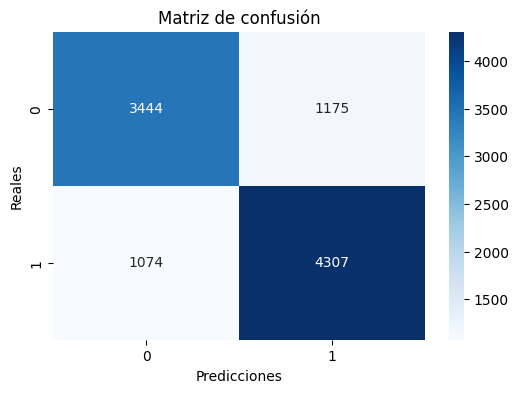

In [59]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predicciones del modelo
y_pred = model.predict(X_test_vec)

# 2. Métricas principales
print("📊 Evaluación del modelo de clasificación:\n")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")

# 3. Reporte detallado
print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# 4. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()


In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7751
Precision: 0.7856621670923021
Recall: 0.8004088459394164
F1 Score: 0.7929669520390316
ROC AUC Score: 0.7730123900621524
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      4619
           1       0.79      0.80      0.79      5381

    accuracy                           0.78     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.78      0.77     10000



**Guardar el modelo**

In [61]:
import joblib

## Librerías Usadas

In [63]:
from watermark import watermark

print(watermark(python=True, iversions=True, globals_=globals()))

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.6.0

re        : 2.2.1
joblib    : 1.5.2
pandas    : 2.3.3
sklearn   : 1.7.2
matplotlib: 3.10.7
seaborn   : 0.13.2
textblob  : 0.19.0
watermark : 2.5.0
spacy     : 3.8.7



---

## Referencias
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [Classification of text documents using sparse features](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html)
- Ejemplo de Entrenamiento y selección de Modelo de machine learning entre varios modelos <https://joserzapata.github.io/post/ciencia-datos-proyecto-python/6-model_selection/>
- https://joserzapata.github.io/courses/python-ciencia-datos/python/
- https://joserzapata.github.io/courses/python-ciencia-datos/pandas/
- https://joserzapata.github.io/courses/python-ciencia-datos/machine-learning/

Docente: [Jose R. Zapata](https://joserzapata.github.io)

- [https://joserzapata.github.io/](https://joserzapata.github.io/)
- [https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/](https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/)